## installing appropriate tf

In [1]:
#!pip install tensorflow==2.4.0 tensorflow-gpu==2.4.1 tensorflow-io matplotlib

In [2]:
#pip install visualkeras

## Loading modules

In [3]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
import math
from IPython.display import Audio
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.io.wavfile import write
import librosa.display
#import visualkeras

In [4]:
SNORING_DATA_PATH = os.path.join('/kaggle/input/snoring/Snoring Dataset','1')
NOT_SNORING_DATA_PATH = os.path.join('/kaggle/input/snoring/Snoring Dataset','0')

In [5]:
SNORING_DATA_PATH

'/kaggle/input/snoring/Snoring Dataset/1'

In [6]:
SNORING_FILE = os.path.join(SNORING_DATA_PATH,'1_0.wav')
NOT_SNORING_FILE = os.path.join(NOT_SNORING_DATA_PATH,'0_0.wav')

In [7]:
os.listdir('/kaggle/input/snoring/Snoring Dataset')


['Snoring_dataset.txt', '0', '1']

In [8]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [9]:
wave = load_wav_16k_mono(SNORING_FILE)
nwave = load_wav_16k_mono(NOT_SNORING_FILE)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  


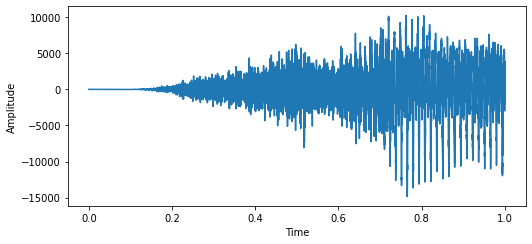

In [10]:
## plot 44100Hz to time
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
input_data = read(SNORING_FILE  )
x_1 = np.linspace(0, 1, 44100)

audio = input_data[1]
plt.plot(x_1,audio[0:44100])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

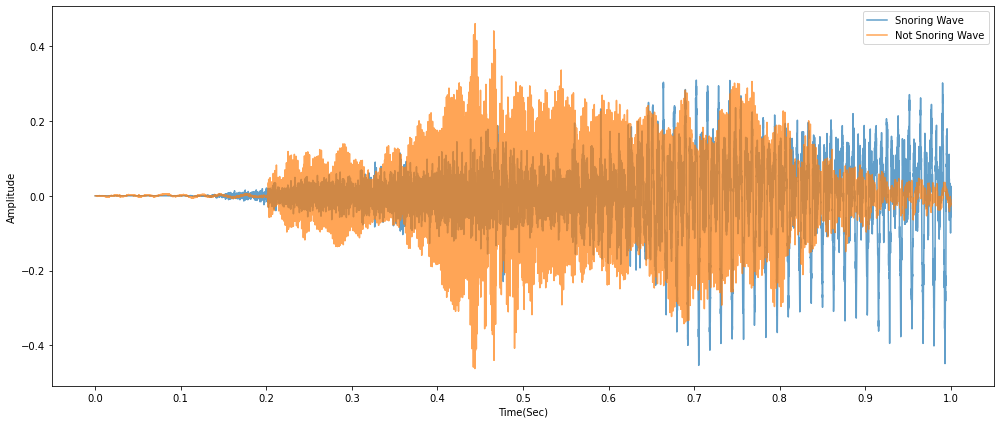

In [11]:
## plot 16000Hz to time

import numpy as np
x = np.linspace(0, 1, 16000)
plt.figure(figsize=(14, 6))
plt.plot(x,wave, alpha=0.7)
plt.plot(x,nwave, alpha=0.7)
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude')
plt.legend(labels=['Snoring Wave', 'Not Snoring Wave'])
plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [12]:
# POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
# NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [13]:
pos = tf.data.Dataset.list_files(SNORING_DATA_PATH+'/*.wav')
neg = tf.data.Dataset.list_files(NOT_SNORING_DATA_PATH+'/*.wav')

In [14]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [15]:
lengths = []
for file in os.listdir(os.path.join(NOT_SNORING_DATA_PATH)):
    tensor_wave = load_wav_16k_mono(os.path.join(NOT_SNORING_DATA_PATH, file))
    lengths.append(len(tensor_wave))

In [16]:
os.listdir(os.path.join(SNORING_DATA_PATH))

['1_183.wav',
 '1_81.wav',
 '1_29.wav',
 '1_193.wav',
 '1_400.wav',
 '1_137.wav',
 '1_398.wav',
 '1_296.wav',
 '1_96.wav',
 '1_208.wav',
 '1_62.wav',
 '1_432.wav',
 '1_492.wav',
 '1_153.wav',
 '1_17.wav',
 '1_336.wav',
 '1_241.wav',
 '1_448.wav',
 '1_461.wav',
 '1_243.wav',
 '1_340.wav',
 '1_25.wav',
 '1_95.wav',
 '1_486.wav',
 '1_128.wav',
 '1_170.wav',
 '1_262.wav',
 '1_30.wav',
 '1_490.wav',
 '1_274.wav',
 '1_73.wav',
 '1_113.wav',
 '1_484.wav',
 '1_19.wav',
 '1_337.wav',
 '1_188.wav',
 '1_381.wav',
 '1_171.wav',
 '1_449.wav',
 '1_88.wav',
 '1_498.wav',
 '1_402.wav',
 '1_218.wav',
 '1_150.wav',
 '1_374.wav',
 '1_311.wav',
 '1_409.wav',
 '1_309.wav',
 '1_435.wav',
 '1_123.wav',
 '1_164.wav',
 '1_331.wav',
 '1_184.wav',
 '1_456.wav',
 '1_147.wav',
 '1_7.wav',
 '1_303.wav',
 '1_433.wav',
 '1_156.wav',
 '1_53.wav',
 '1_369.wav',
 '1_91.wav',
 '1_488.wav',
 '1_373.wav',
 '1_23.wav',
 '1_390.wav',
 '1_284.wav',
 '1_145.wav',
 '1_473.wav',
 '1_469.wav',
 '1_35.wav',
 '1_348.wav',
 '1_494.w

In [17]:
lengths

[16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,
 16000,


In [18]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [19]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [20]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=16000>

In [21]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:16000]
    zero_padding = tf.zeros([16000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [22]:
filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()
#positives = Snoring , negatives = Not Snoring

In [23]:
wav = load_wav_16k_mono(filepath)
wav = wav[:16000]
wav

<tf.Tensor: shape=(16000,), dtype=float32, numpy=
array([-4.3338713e-07,  1.1556292e-06, -6.5071930e-07, ...,
       -1.5250076e-02, -1.4177072e-02, -1.7864566e-02], dtype=float32)>

In [24]:
spectrogram, label = preprocess(filepath, label)

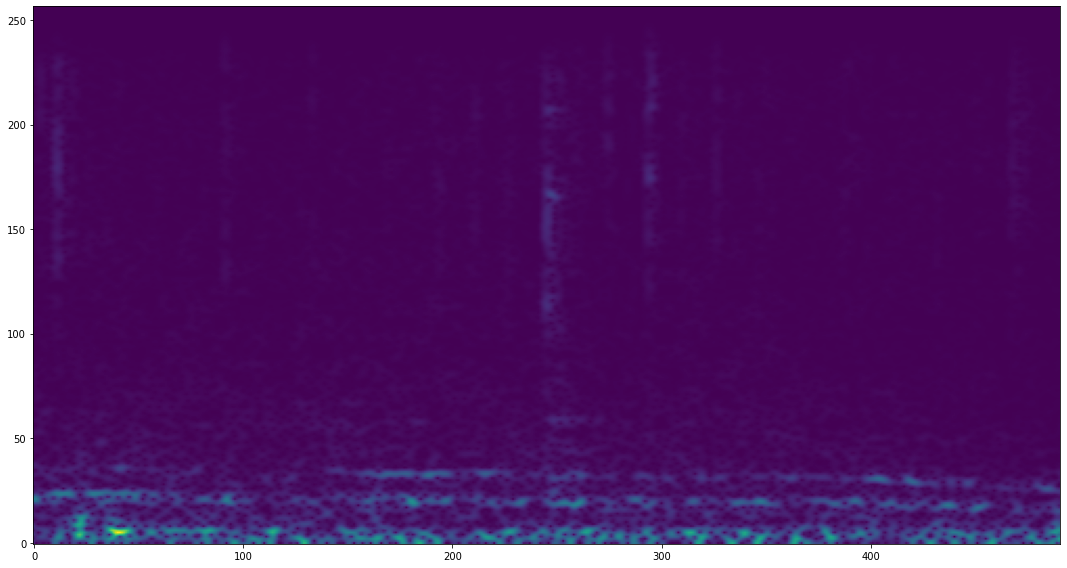

In [25]:
plt.figure(figsize=(15,8))
plt.imshow(tf.transpose(spectrogram)[0])
plt.gca().invert_yaxis()
plt.show()

In [26]:
data.as_numpy_iterator().next()

(b'/kaggle/input/snoring/Snoring Dataset/1/1_353.wav', 1.0)

In [27]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(64)
data = data.prefetch(8)

In [28]:
len(data)

16

In [29]:
import math
train = data.take(math.ceil(len(data)*.7))
test = data.skip(math.ceil(len(data)*.7)).take(math.floor(len(data)*.3))


In [30]:
samples, labels = train.as_numpy_iterator().next()

In [31]:
samples.shape

(64, 491, 257, 1)

In [32]:
input_shape = samples.shape[1:]
input_shape

(491, 257, 1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten,MaxPooling2D,Dropout,GlobalAveragePooling2D,Activation

## Build model architecture

In [34]:
#first model
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 489, 255, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 487, 253, 16)      2320      
_________________________________________________________________
flatten (Flatten)            (None, 1971376)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               252336256 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 252,338,865
Trainable params: 252,338,865
Non-trainable params: 0
_________________________________________________________________


In [37]:
"""
from collections import defaultdict
from PIL import ImageFont
import visualkeras
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

font = ImageFont.truetype("arial.ttf", 32)
visualkeras.layered_view(model, to_file='../Arch.png', min_xy=100, min_z=100, scale_xy=100, scale_z=100, one_dim_orientation='x')
"""

'\nfrom collections import defaultdict\nfrom PIL import ImageFont\nimport visualkeras\ncolor_map = defaultdict(dict)\ncolor_map[Conv2D][\'fill\'] = \'orange\'\ncolor_map[Dense][\'fill\'] = \'green\'\ncolor_map[Flatten][\'fill\'] = \'teal\'\n\nfont = ImageFont.truetype("arial.ttf", 32)\nvisualkeras.layered_view(model, to_file=\'../Arch.png\', min_xy=100, min_z=100, scale_xy=100, scale_z=100, one_dim_orientation=\'x\')\n'

## Training the model

In [38]:
hist = model.fit(train, epochs=10, validation_data=test)

Epoch 1/10
12/12 [==============================] - 18s 332ms/step - loss: 22.9202 - recall: 0.6120 - precision: 0.5353 - val_loss: 2.7136 - val_recall: 0.3391 - val_precision: 0.6842
Epoch 2/10
12/12 [==============================] - 3s 266ms/step - loss: 1.2022 - recall: 0.7247 - precision: 0.6755 - val_loss: 0.5299 - val_recall: 0.6320 - val_precision: 0.8587
Epoch 3/10
12/12 [==============================] - 3s 265ms/step - loss: 0.3729 - recall: 0.6605 - precision: 0.9432 - val_loss: 0.2962 - val_recall: 0.8584 - val_precision: 0.8981
Epoch 4/10
12/12 [==============================] - 3s 267ms/step - loss: 0.2385 - recall: 0.9016 - precision: 0.8968 - val_loss: 0.2140 - val_recall: 0.8952 - val_precision: 0.9823
Epoch 5/10
12/12 [==============================] - 3s 268ms/step - loss: 0.1664 - recall: 0.9217 - precision: 0.9751 - val_loss: 0.1322 - val_recall: 0.9817 - val_precision: 0.9727
Epoch 6/10
12/12 [==============================] - 3s 268ms/step - loss: 0.1068 - recal

## Results of the model

In [39]:
loss = 'loss'
val_loss = 'val_loss'
recall = 'recall'
val_recall = 'val_recall'
precision = 'precision'
val_precision = 'val_precision'

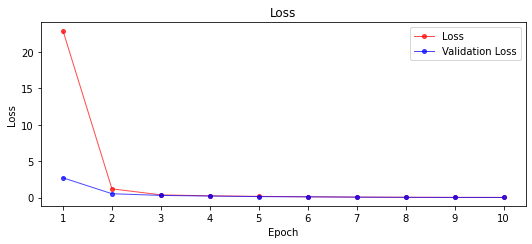

In [40]:
x_values = np.arange(1,11,1)
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,4)

plt.title('Loss')
plt.plot(x_values,hist.history[loss], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Loss',markersize=4)
plt.plot(x_values,hist.history[val_loss], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Loss',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[loss]
z = hist.history[loss]
val_z = hist.history[val_loss]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Loss = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-5, 25), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Loss = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-5, 15), ha='center',
                    textcoords='offset points')
    i=i+1 
plt.show()

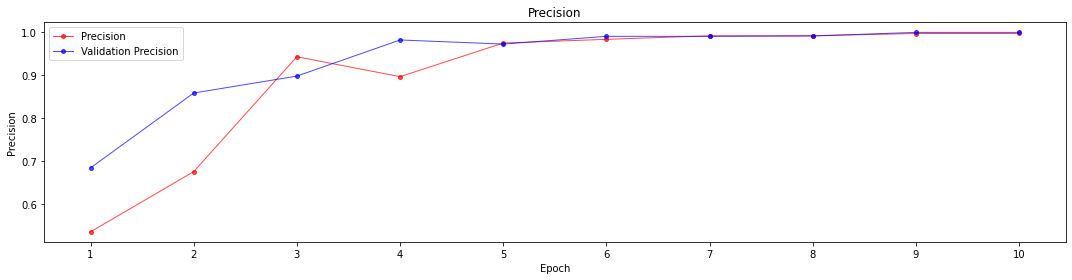

In [41]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,3)

plt.title('Precision')
plt.plot(x_values,hist.history[precision], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Precision',markersize=4)
plt.plot(x_values,hist.history[val_precision], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Precision',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[precision]
z = hist.history[precision]
val_z = hist.history[val_precision]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Prec. = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-0, -15), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Prec. = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-0, -25), ha='center',
                    textcoords='offset points')
    i=i+1 
plt.show()

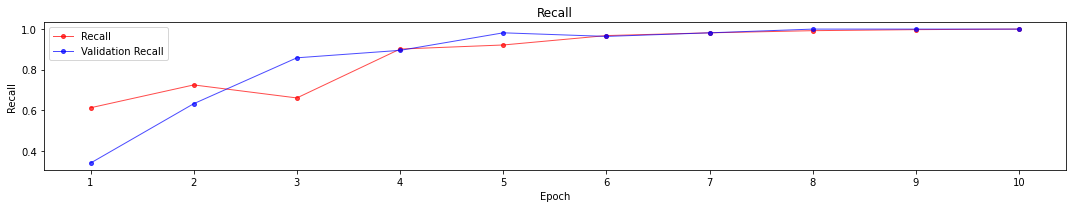

In [42]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (15,4)

plt.title('Recall')
ax.plot(x_values,hist.history[recall], 'r',marker='o', linewidth=1,alpha=0.7,label = 'Recall',markersize=4)
ax.plot(x_values,hist.history[val_recall], 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation Recall',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.xticks(x_values)
x = x_values
y = hist.history[recall]
z = hist.history[recall]
val_z = hist.history[val_recall]
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('Recall = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-0, -15), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. Recall = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-0, -25), ha='center',
                    textcoords='offset points')
    i=i+1    
plt.show()

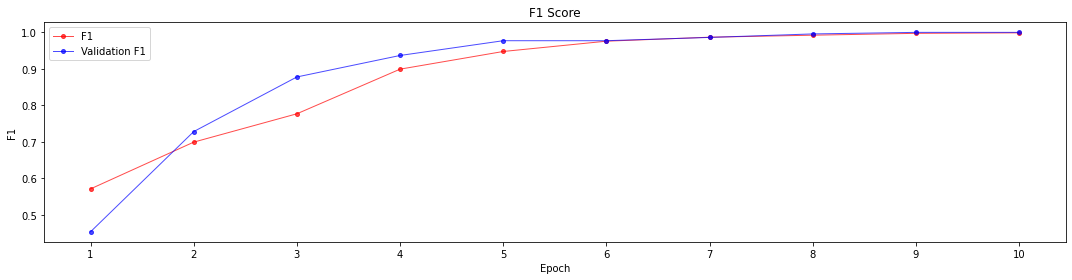

In [43]:
fig, ax = plt.subplots()

f1 = []
val_f1 = []
for i in range (0,len(hist.history[recall])):
    f1.append(2 * (hist.history[recall][i] * hist.history[precision][i]) / 
              (hist.history[recall][i] + hist.history[precision][i]))
    val_f1.append(2 * (hist.history[val_recall][i] * hist.history[val_precision][i]) / 
              (hist.history[val_recall][i] + hist.history[val_precision][i]))
plt.rcParams['figure.figsize'] = (14,4)

plt.title('F1 Score')
ax.plot(x_values,f1, 'r',marker='o', linewidth=1,alpha=0.7,label = 'F1',markersize=4)
ax.plot(x_values,val_f1, 'b',marker='o', linewidth=1,alpha=0.7,label = 'Validation F1',markersize=4)
plt.xlabel('Epoch')
plt.ylabel('F1')
plt.legend()
plt.xticks(x_values)
x = x_values
y = f1
z = f1
val_z = val_f1
i=0
for X, Y, Z,VAL_Z in zip(x, y, z,val_z):
    if i==14:
        # Annotate the points 5 _points_ above and to the left of the vertex
        ax.annotate('F1 = {}'.format(round(Z,5)), xy=(X,Y), xytext=(-0, -15), ha='center',
                    textcoords='offset points')
        ax.annotate('Val. F1 = {}'.format(round(VAL_Z,5)), xy=(X,Y), xytext=(-0, -25), ha='center',
                    textcoords='offset points')
    i=i+1 
plt.show()    

## Save and Load the model

In [44]:
model_name = 'my_h5_model_15_10_22.h5'

In [45]:
tf.keras.models.save_model(model, './saved_models/' + model_name)

In [46]:
my_h5_saved_model = tf.keras.models.load_model(
    './saved_models/' + model_name)
model = my_h5_saved_model

## Test Data

In [47]:
X_test, y_test = test.as_numpy_iterator().next()

In [48]:
yhat_x_test = model.predict(X_test)

In [49]:
yhat_x_test = [1 if prediction > 0.5 else 0 for prediction in yhat_x_test]

In [50]:
yhat_x_test

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1]

In [51]:
y_test.astype(int)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [52]:
confusion_matrix(y_test.astype(int),yhat_x_test)

array([[35,  0],
       [ 0, 29]])

## Try Audio with some noise

In [53]:
audio_name = os.path.join('../input/snoring-test/Test_long_MP3_data/Record (online-voice-recorder.com) (8).mp3')

In [54]:
def load_mp3_16k_mono(filename):
    """ Load a MP3/WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [55]:
wav = load_mp3_16k_mono(audio_name) 

In [56]:
len(wav)

211968

In [57]:
avg_power_of_signal = sum(wav**2)/len(wav)

In [58]:
SNR_dB = 3.5

In [59]:
SNR_linear = 10 ** SNR_dB / 10
avg_power_of_noise = avg_power_of_signal / SNR_linear
noise = np.random.normal(0, avg_power_of_noise ** 0.5, wav.shape)
wav = (wav + noise ) * 32768.0 
print(wav)

tf.Tensor(
[-12.471889  -11.595052  -17.103998  ...   7.1474924  -3.9934
  -4.246055 ], shape=(211968,), dtype=float32)


In [60]:
min_wav = (min(wav))
min_wav

<tf.Tensor: shape=(), dtype=float32, numpy=-5131.8853>

In [61]:
if len(wav) > 16000:
    sequence_stride = 16000
else:
    sequence_stride = 16000-1
    

In [62]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=sequence_stride, batch_size=1)

In [63]:
samples, index = audio_slices.as_numpy_iterator().next()

In [64]:
len(audio_slices)

13

In [65]:
samples.shape

(1, 16000)

In [66]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([16000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [67]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=sequence_stride, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [68]:
audio_slices

<BatchDataset shapes: (None, None, 257, 1), types: tf.float32>

In [69]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.99 else 0 for prediction in yhat]

In [70]:
yhat

[0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]

In [71]:
from itertools import groupby

In [72]:
yhat1 = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat1).numpy()

In [73]:
calls

4

In [74]:
from itertools import groupby

In [75]:
yhat_new = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat_new).numpy()

In [76]:
calls

4

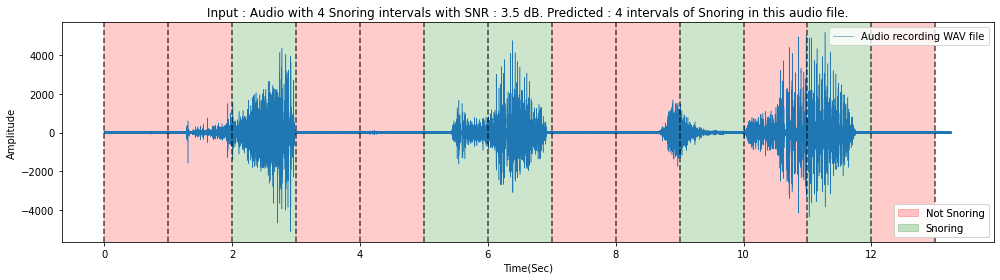

In [77]:
import numpy as np
import matplotlib.collections as collections
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (14,5)

x = np.linspace(0, len(wav)/16000, len(wav))
ax.plot(x,wav,linewidth=0.5)
plt.xlabel('Time(Sec)')
plt.ylabel('Amplitude')

for i in range(len(yhat)+1):
    x=i
    ax.axvline(x, color='black', linestyle='--',alpha=0.7)
    if i != len (yhat):
        yrange = (4*min_wav, -6*min_wav)
        xrange1 = [(i, 1)]
        color='red'
        if yhat[i]==1:
            c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='green', alpha=0.2)
            ax.add_collection(c)

        else:
            c = collections.BrokenBarHCollection (xrange1,yrange, facecolor='red', alpha=0.2)
            ax.add_collection(c)

       
    
red_patch = mpatches.Patch(color='red', label='Not Snoring', alpha=0.2)
green_patch = mpatches.Patch(color='green', label='Snoring', alpha=0.2)

leg1 = ax.legend(labels=['Audio recording WAV file'], loc= 1)

leg2 = ax.legend(handles=[red_patch,green_patch], loc =4)
ax.add_artist(leg1)
ax.add_artist(leg2)
plt.title(f'Input : Audio with {calls} Snoring intervals with SNR : {SNR_dB} dB. Predicted : {calls} intervals of Snoring in this audio file.')
plt.show()

In [78]:
wav/(max(wav))

<tf.Tensor: shape=(211968,), dtype=float32, numpy=
array([-0.00240779, -0.00223851, -0.00330206, ...,  0.00137988,
       -0.00077096, -0.00081973], dtype=float32)>

In [79]:
wav.numpy().astype(np.int16) 

array([-12, -11, -17, ...,   7,  -3,  -4], dtype=int16)

In [80]:
#write(f'./New_data_created/0/0_noise_00.wav', 16000, wav.numpy().astype(np.int16))


In [81]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
spectrogram = tf.abs(spectrogram)
spectrogram = tf.expand_dims(spectrogram, axis=2)

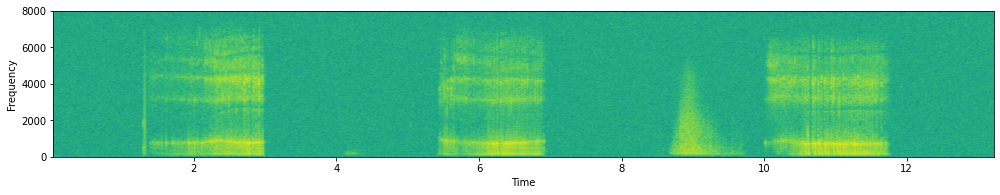

In [82]:
#wav = load_mp3_16k_mono(audio_name) 
plot_b = plt.subplot(211)
plot_b.specgram(wav, NFFT=1024, Fs=16000, noverlap=900)
plot_b.set_xlabel('Time')
plot_b.set_ylabel('Frequency')

plt.show()